In [1]:
import pandas

pandas.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
agency_spending_data = pandas.read_csv('../data/Aggregate_federal_country_year_agency_.csv')
cabinet_data = pandas.read_csv('../data/cabinet.csv')

### First, we will look for the unique departments and positions within both datasets.

In [3]:
agencies = pandas.unique(agency_spending_data['agency'])
pandas.DataFrame({'Agencies': agencies})

,Agencies
0,ADMINISTRATIVE CONFERENCE OF THE U.S. (ACUS)
1,AFRICAN DEVELOPMENT FOUNDATION (EOP)
2,AGENCY FOR INTERNATIONAL DEVELOPMENT (USAID)
3,AMERICAN BATTLE MONUMENTS COMMISSION (ABMC)
4,ARMED FORCES RETIREMENT HOME (AFRH)
5,BROADCASTING BOARD OF GOVERNORS (BBG)
6,COMMISSION ON CIVIL RIGHTS (USCCR)
7,COMMITTEE FOR PURCHASE FROM PEOPLE WHO ARE BLI...
8,COMMODITY FUTURES TRADING COMMISSION (CFTC)
9,CONSUMER FINANCIAL PROTECTION BUREAU (CFPB)


In [4]:
cabinet_positions = pandas.unique(cabinet_data['Position'])
pandas.DataFrame({'position': cabinet_positions})

,position
0,Secretary of State
1,Secretary of Agriculture
2,Secretary of Commerce
3,Secretary of Housing and Urban Development
4,Secretary of the Treasury
5,Attorney General
6,Secretary of Defense
7,Secretary of Education
8,Secretary of Health and Human Services
9,Secretary of the Interior


### Given this, and other information, we will attempt to map the departments themselves

In [5]:
position_agency_mappings = {
    'Secretary of State': 'DEPARTMENT OF STATE (DOS)',
    'Secretary of Agriculture': 'DEPARTMENT OF STATE (DOS)',
    'Secretary of Commerce': 'DEPARTMENT OF COMMERCE (DOC)',
    'Secretary of Housing and Urban Development': 'DEPARTMENT OF HOUSING AND URBAN DEVELOPMENT (HUD)',
    'Secretary of the Treasury': 'DEPARTMENT OF THE TREASURY (TREAS)',
    'Attorney General': 'DEPARTMENT OF JUSTICE (DOJ)',
    'Secretary of Defense': 'DEPARTMENT OF DEFENSE (DOD)',
    'Secretary of Education': 'DEPARTMENT OF EDUCATION (ED)',
    'Secretary of Health and Human Services': 'DEPARTMENT OF HEALTH AND HUMAN SERVICES (HHS)',
    'Secretary of the Interior': 'DEPARTMENT OF THE INTERIOR (DOI)',
    'Secretary of Veterans Affairs': 'DEPARTMENT OF VETERANS AFFAIRS (VA)',
    'Secretary of Energy': 'DEPARTMENT OF ENERGY (DOE)',
    'Secretary of Transportation': 'DEPARTMENT OF TRANSPORTATION (DOT)',
    'Secretary of Labor': 'DEPARTMENT OF LABOR (DOL)',
    'Secretary of Homeland Security': 'DEPARTMENT OF HOMELAND SECURITY (DHS)',
}

In [6]:
import datetime
def convert_date_to_be_relative_year(date_str: str) -> float:
    date = datetime.datetime.strptime(date_str, '%Y-%m-%d')
    days_of_year = int(date.strftime('%j'))
    year = int(date.strftime('%Y'))

    return year + days_of_year / 366

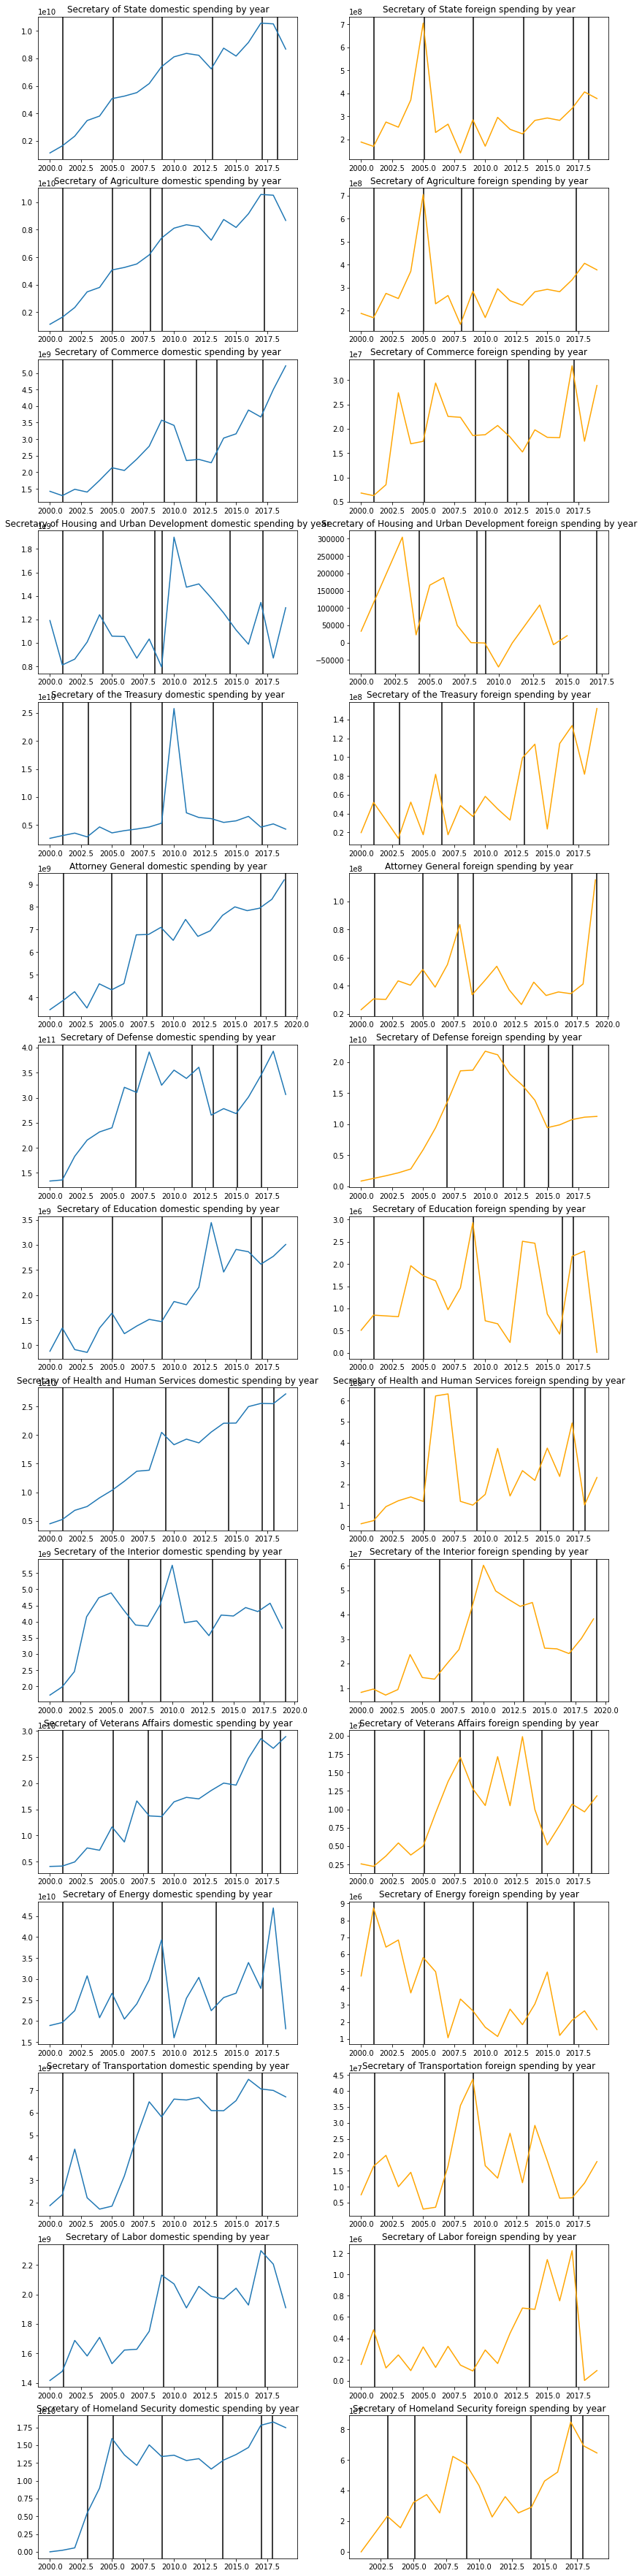

In [7]:
from matplotlib import pyplot as plt
import math

# Testing var - this will be expanded to all positions once we get this working
POSITION = 'Secretary of Defense'

spending_by_cabinet_figure = plt.figure(figsize=(14,64))
for i, position in enumerate(position_agency_mappings.keys()):
    domestic_plot = spending_by_cabinet_figure.add_subplot(len(position_agency_mappings), 2, i * 2 + 1)
    foreign_plot = spending_by_cabinet_figure.add_subplot(len(position_agency_mappings), 2, i * 2 + 2)

    cabinet_position_dates = cabinet_data[cabinet_data['Position'] == position].sort_values('Confirmed')['Confirmed']
    for date in cabinet_position_dates:
        if isinstance(date, float) and math.isnan(date):
            continue

        relative_year = convert_date_to_be_relative_year(date)
        for plot in [domestic_plot, foreign_plot]:
            plot.axvline(relative_year, color='black')

    agency_spending = agency_spending_data[
        (agency_spending_data['agency'] == position_agency_mappings[position])
        # Filter out valid years
        & (agency_spending_data['year'] < 2020)
        & (agency_spending_data['year'] >= 2000)
    ]

    domestic_spending = agency_spending[agency_spending['country'] == 'USA']
    foreign_spending = agency_spending[agency_spending['country'] != 'USA'].groupby(['year'], as_index=False)['sum'].sum()
    foreign_spending.reset_index()

    domestic_plot.plot(
        domestic_spending['year'],
        domestic_spending['sum'],
    )
    domestic_plot.set_title(position + ' domestic spending by year')
    foreign_plot.plot(
        foreign_spending['year'],
        foreign_spending['sum'],
        color='orange'
    )
    foreign_plot.set_title(position + ' foreign spending by year')

plt.show()